In [1]:
import sys
sys.path.append('../')
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout
from smodels.theory.element import Element
from smodels.particlesLoader import BSMList
from smodels.share.models.SMparticles import SMList
from smodels.theory.model import Model
from smodels.theory.tree import Tree
import itertools


In [2]:
slhafile = '../inputFiles/slha/lightEWinos.slha'
model = Model( BSMparticles=BSMList, SMparticles=SMList)
model.updateParticles(inputFile=slhafile,erasePrompt=['spin'])

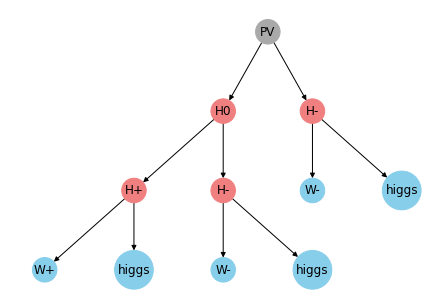

[PV, H0, H-, H+, H-, W-, higgs, W+, higgs, W-, higgs]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[(PV, H0), (PV, H-), (H0, H+), (H0, H-), (H-, W-), (H-, higgs), (H+, W+), (H+, higgs), (H-, W-), (H-, higgs)]


In [3]:
stringEla = "(PV > H0(1),H-(2)), (H0(1) > H+(3),H-(4)), (H+(3) > W+,higgs), (H-(4) > W-,higgs), (H-(2) > W-,higgs)"
ela = Element(info=stringEla,model=model)
ela.drawTree(nodeScale=3)
print(ela.tree.nodes)
print([n.node for n in ela.tree.nodes])
print(ela.tree.edges)

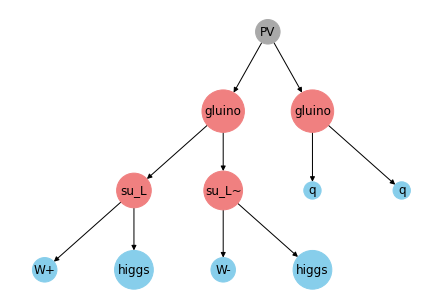

[PV, gluino, gluino, su_L, su_L~, q, q, W+, higgs, W-, higgs]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[(PV, gluino), (PV, gluino), (gluino, su_L), (gluino, su_L~), (gluino, q), (gluino, q), (su_L, W+), (su_L, higgs), (su_L~, W-), (su_L~, higgs)]


In [4]:
stringElb = "(PV > gluino(1),gluino(2)), (gluino(2) > u,u), (gluino(1) > su_L(3),su_L~(4)), (su_L(3) > higgs,W+), (su_L~(4) > higgs,W-)"
elb = Element(info=stringElb,model=model)
elb.drawTree(nodeScale=3)
print(elb.tree.nodes)
print([n.node for n in elb.tree.nodes])
print(elb.tree.edges)

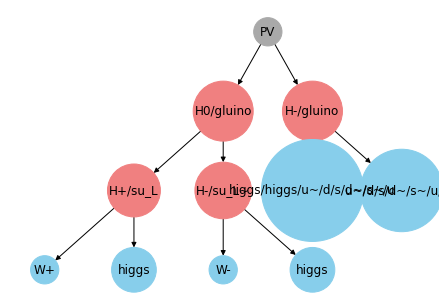

[PV, H0/gluino, H-/gluino, H+/su_L, H-/su_L~, higgs/higgs/u~/d/s/d~/s~/u, u~/d/s/d~/s~/u/W-, W+, higgs, W-, higgs]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[(PV, H0/gluino), (PV, H-/gluino), (H0/gluino, H+/su_L), (H0/gluino, H-/su_L~), (H-/gluino, higgs/higgs/u~/d/s/d~/s~/u), (H-/gluino, u~/d/s/d~/s~/u/W-), (H+/su_L, W+), (H+/su_L, higgs), (H-/su_L~, W-), (H-/su_L~, higgs)]


In [5]:
newEl = ela+elb
newEl.drawTree()
print(newEl.tree.nodes)
print([n.node for n in newEl.tree.nodes])
print(newEl.tree.edges)